In [8]:
import numpy as np
import pandas as pd

# load csv to df
df = pd.read_csv('hold.csv')

In [9]:
df

,start,end,events
0,12019040,12019041,1
1,12025218,12025671,2
2,12045734,12045717,1
3,12113827,12113810,1
4,12155438,12155421,1
...,...,...,...
542,21861499,21861482,1
543,21875903,21878388,2
544,21934425,21936085,2
545,22039955,22039938,1


In [10]:
# trừ giá trị của start và end  cho 	14029694
df['start'] = df['start'] - 12019040
df['end'] = df['end'] - 12019040
df

,start,end,events
0,0,1,1
1,6178,6631,2
2,26694,26677,1
3,94787,94770,1
4,136398,136381,1
...,...,...,...
542,9842459,9842442,1
543,9856863,9859348,2
544,9915385,9917045,2
545,10020915,10020898,1


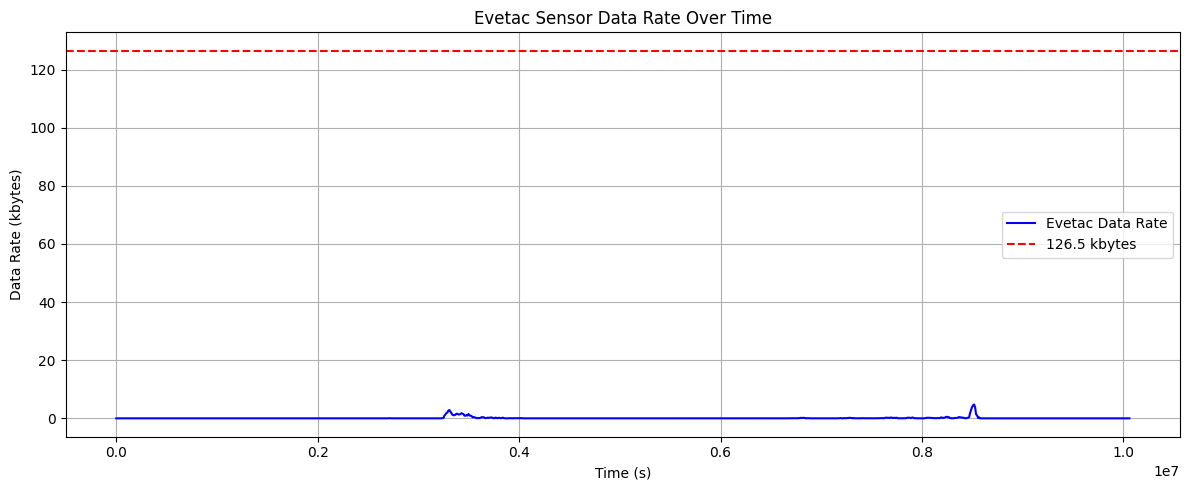

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính thời gian trung bình mỗi interval (giây)
df['time_s'] = (df['start'] + df['end']) / 2 

# Tính số byte từ events
df['bytes'] = df['events'] * 5 / 1024  # Chuyển đổi từ bytes sang kilobytes


# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
plt.plot(df['time_s'], df['bytes'], label='Evetac Data Rate', color='blue')

# Vẽ đường ngang tại 0.5 kbytes
plt.axhline(y=126.5, color='r', linestyle='--', label='126.5 kbytes')

plt.xlabel('Time (s)')
plt.ylabel('Data Rate (kbytes)')
plt.title('Evetac Sensor Data Rate Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


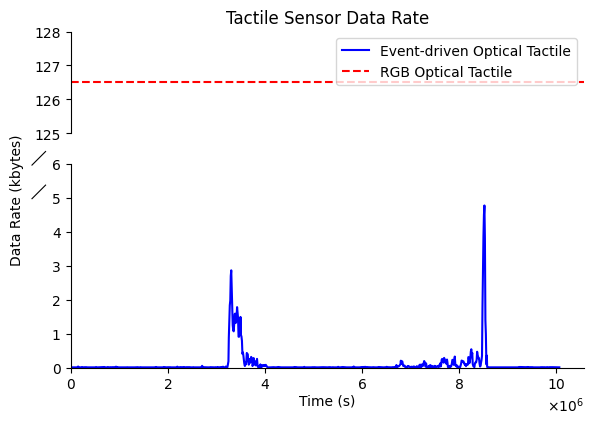

In [17]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.ticker import ScalarFormatter

# Khởi tạo brokenaxes
bax = brokenaxes(ylims=((0, 6), (125, 128)))

# Vẽ dữ liệu
bax.plot(df['time_s'], df['bytes'], label='Event-driven Optical Tactile', color='blue')
bax.axhline(126.5, color='r', linestyle='--', label='RGB Optical Tactile')

# Tùy chỉnh định dạng trục x về 1e6
for ax in bax.axs:
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(6, 6))  # ép x10^6

bax.set_xlabel('Time (s)')
bax.set_ylabel('Data Rate (kbytes)')
bax.set_title('Tactile Sensor Data Rate')
bax.grid(False)
bax.legend(loc='upper right')
bax.set_xlim(left=0)

# Lưu hình
plt.savefig('broken_axes_plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [16]:
print(df['time_s'].min())

0.5
